In [84]:
import numpy as np
from numpy.fft import fft, ifft
from PIL import Image

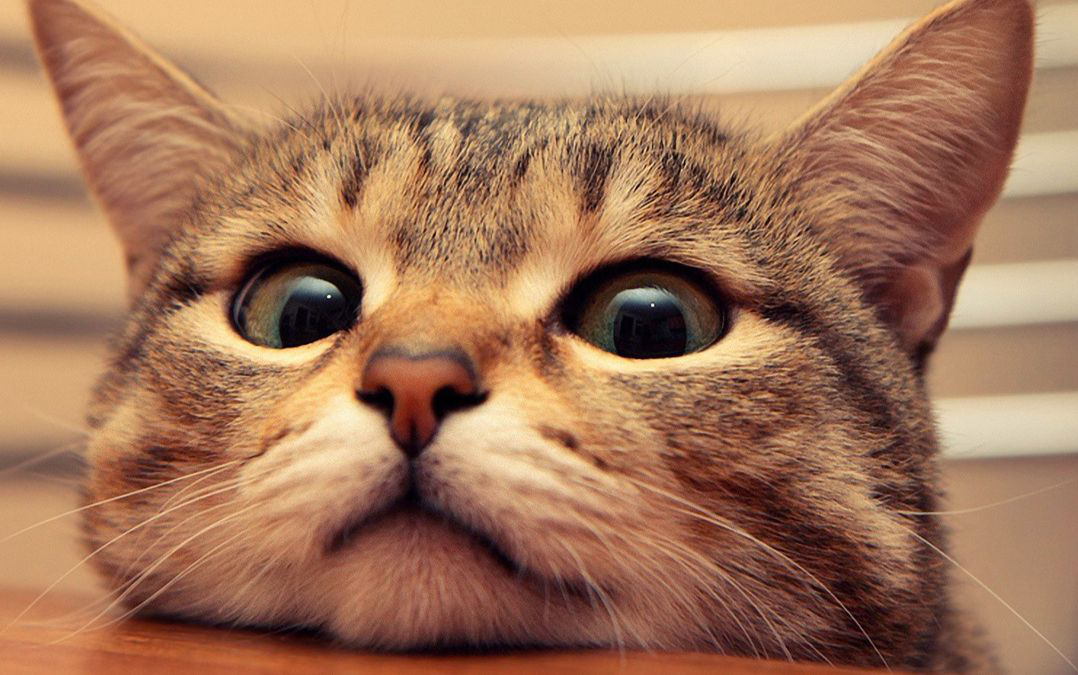

In [85]:
cat = Image.open('cat.jpg')
cat

In [86]:
cat_data = np.frombuffer(cat.tobytes(), dtype=np.int8)

In [87]:
cat_data

array([ -15,  -60, -115, ...,  123,   95,   91], dtype=int8)

In [88]:
cat_data_fft = fft(cat_data)
cat_data_fft

array([10372205.               +0.        j,
       -5455074.29715134+10548148.66341358j,
       -6096972.64926267+16810524.93426408j, ...,
       -7819153.70054599-13474222.7765032 j,
       -6096972.64926283-16810524.93426405j,
       -5455074.29715145-10548148.66341355j])

In [89]:
cat_data_fft[np.where(np.abs(cat_data_fft) < 1e6 / 2)] = 0

In [90]:
cat_data_ifft = ifft(cat_data_fft)
cat_data_ifft

array([-24.0592329 +8.98333034e-14j, -30.47352264-1.23924095e-13j,
        24.8588451 -1.48313578e-13j, ..., -27.02094971+7.40398701e-14j,
       -20.52273772-5.19966967e-13j,  29.86870402-4.75447496e-13j])

In [91]:
cat_data_real = np.real(cat_data_ifft)
cat_data_real

array([-24.0592329 , -30.47352264,  24.8588451 , ..., -27.02094971,
       -20.52273772,  29.86870402])

In [92]:
cat_data_result = np.int8(cat_data_real)
cat_data_result

array([-24, -30,  24, ..., -27, -20,  29], dtype=int8)

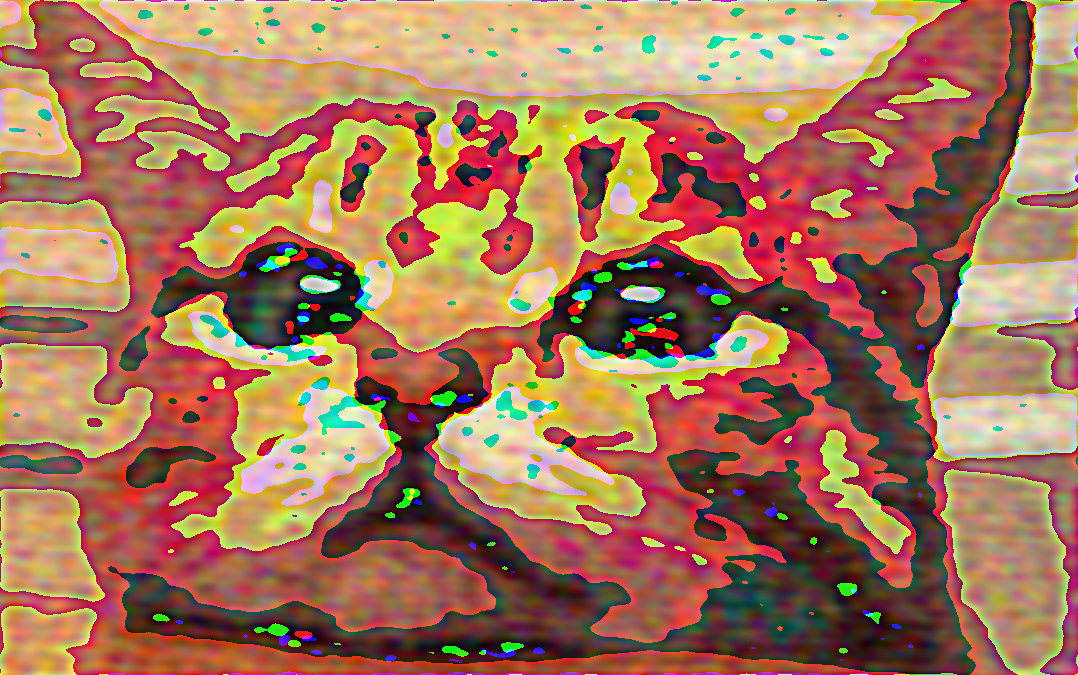

In [93]:
cat_image = Image.frombytes(mode=cat.mode, size=cat.size, data=cat_data_result)
cat_image